In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
from sqlalchemy import text
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# query = text("SELECT * FROM station;")
# data = engine.execute(query)
# for row in data:
#     print(row)

In [7]:
# query = text("SELECT * FROM measurement;")
# data = engine.execute(query)
# for row in data:
#     print(row)

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
last_result = session.query(Measurement).order_by(Measurement.date.desc()).first()
# print(last_result.__dict__)
last_result.date




'2017-08-23'

Text(0.5, 0, 'Dates')

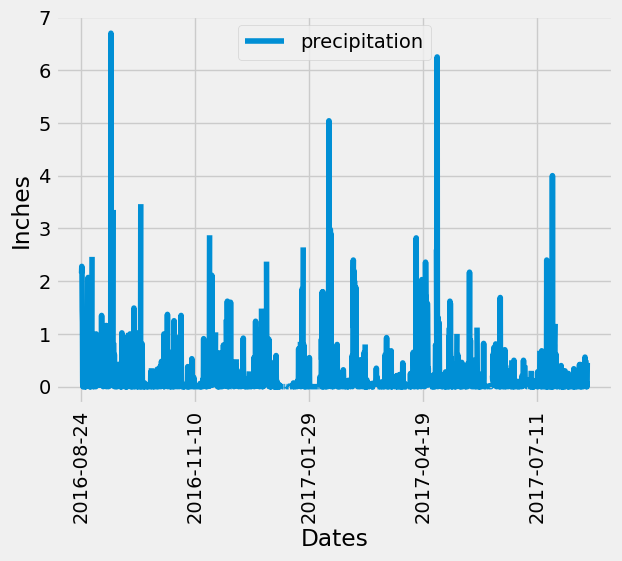

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
from datetime import datetime
import dateutil.relativedelta

last_date = datetime.strptime(last_result.date, "%Y-%m-%d")
previous_date = last_date - dateutil.relativedelta.relativedelta(months=12)
# print(last_date)
# print(previous_date)
      
# Perform a query to retrieve the data and precipitation scores
measurements = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_date).all()
# print(measurements)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(measurements, columns=["date", "precipitation"])
df.head()


# Sort the dataframe by date
df = df.sort_values("date")
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(x="date", y="precipitation", rot = 90)
ax.set_ylabel("Inches")
ax.set_xlabel("Dates")
# ax.xticks(rotation = 90)


In [51]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[["precipitation"]].describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = station_activity[0][0]
stats= [
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
    ]
station_stats = session.query(*stats).filter(Measurement.station==most_active_id).all()


station_stats

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

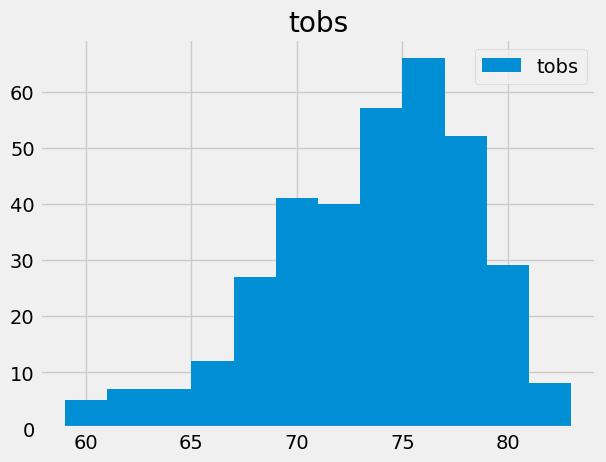

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data = session.query(Measurement.tobs).filter(Measurement.station==most_active_id, Measurement.date >= previous_date).all()
df_tobs = pd.DataFrame(hist_data, columns=["tobs"])
df_tobs.hist(bins=12,legend=True)




# Close Session

In [74]:
# Close Session
session.close()